#Randomness

In [64]:
import matplotlib.pyplot as plt

In [65]:
%matplotlib inline

The random module gives us lots of ways to get and use random numbers. Actually, it uses psuedo-random numbers. Without an external source of randomness, a computer cannot generate real random numbers.

Let's create our own random number generator.

In [13]:
def rng(seed=1):
    def rand():
        nonlocal seed
        seed = (7 * seed) % 101
        return (seed - 1) % 10 + 1
    return rand

In [14]:
rand = rng(1999)

In [20]:
print(rand())
print(rand())
print(rand())
print(rand())

8
1
5
10


That seemed to work. What happens if we run it 100 times?

In [21]:
num = [rand() for _ in range(100)]

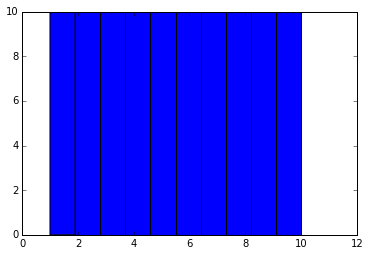

In [24]:
plt.hist(num)
plt.show()

We got each number the same amount of times, which isn't very random. We'd expect that they'd be close, but not all the same.

Let's look at a random number generator implementation from BSD Unix. This is not a very good RNG -- it's too predictable -- but better than ours.

In [29]:
def bsd_rand(seed):
   def rand():
      nonlocal seed
      seed = (1103515245*seed + 12345) & 0x7fffffff
      return seed / 2147483647
   return rand

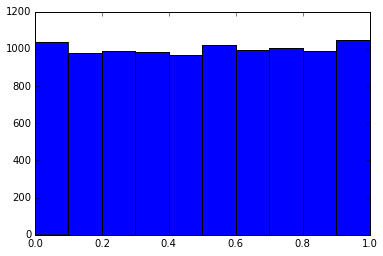

In [32]:
rand = bsd_rand(5)
nums = [rand() for _ in range(10000)]
plt.hist(nums)
plt.show()

# The random module

Everything in the random module is built off of random.random. This is psuedo-random, as you can see here.

In [33]:
import random

In [39]:
random.seed(1)
[random.random() for _ in range(5)]

[0.13436424411240122,
 0.8474337369372327,
 0.763774618976614,
 0.2550690257394217,
 0.49543508709194095]

This is a better random number generator than ours, of course, so the numbers generated will not be 100% evenly distributed.

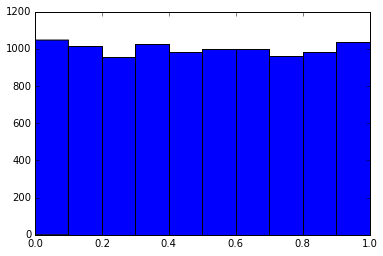

In [40]:
nums = [random.random() for _ in range(10000)]
plt.hist(nums)
plt.show()

## Other distributions

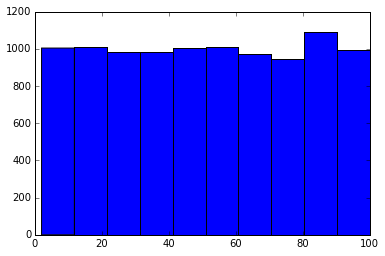

In [43]:
uni = [random.uniform(2, 100) for _ in range(10000)]
plt.hist(uni)
plt.show()

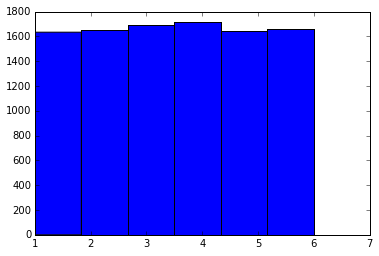

In [47]:
ints = [random.randint(1, 6) for _ in range(10000)]
plt.hist(ints, 6)
plt.show()


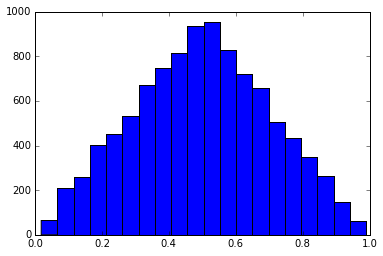

In [51]:
triangular = [random.triangular(0.0, 1.0) for _ in range(10000)]
plt.hist(triangular, bins=20)
plt.show()

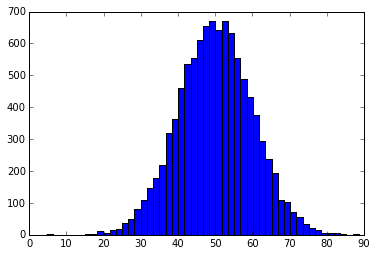

In [53]:
gauss = [random.gauss(50, 10) for _ in range(10000)]
plt.hist(gauss,bins=50)
plt.show()

In [54]:
lista = [1,2,3,4,5,6,7,8,9,0]

In [55]:
random.choice(lista)

9

In [56]:
random.shuffle(lista)

In [57]:
lista

[6, 0, 4, 8, 7, 9, 2, 5, 3, 1]

In [59]:
random.sample(lista, 7)

[6, 4, 8, 1, 5, 2, 7]

#Get PI Randomly

In [62]:
def is_in_circle(x, y, r=0.5):
    return (x**2 + y**2) < r**2

first_sample = is_in_circle(0.4, 0.4)
print(first_sample)

False


In [63]:
sample = [(random.uniform(-0.5, 0.5), random.uniform(-0.5, 0.5)) for _ in range(100000)]
results = [is_in_circle(x, y, 0.5) for x, y in sample]
m = len(results)
n = results.count(True)

print((n/m) * 4)

3.14156
